In [1]:
# Import basic packages
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics.pairwise import linear_kernel       # cosine_similarity as linear_kernel#
from scipy.cluster.hierarchy import dendrogram, linkage
import pyDigest
%matplotlib inline                                       

/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(

In [2]:
# Load dataframes
path_doc = '/home/mribary/Dropbox/pyDigest/dump/D_doc_sections_001.csv'
path_tfidf = '/home/mribary/Dropbox/pyDigest/dump/D_tfidf_sections_001.csv'
df = pd.read_csv(path_doc, index_col=0)     # Sections with documents inlcuding lemmas from text
tf = pd.read_csv(path_tfidf, index_col=0)   # Original tfidf matrix
terms = list(tf.columns)                    # List of terms included in the Tfidf matrix as dimensions
section_IDs = list(df.index)                # List for section_IDs

In [3]:
# List the first 100 terms with the highest tfidf scores in a section
# list(tf.loc[0].sort_values(ascending=False)[0:100].index)

# Create list of unique terms which appear in the top 100 tfidf of sections
top_terms = []
for i in tf.index:
    t = list(tf.loc[i].sort_values(ascending=False)[0:100].index)
    top_terms.extend(t)
top_terms = list(set(top_terms))        # 6286 unique terms

# Keep top terms in the tfidf matrix
top_tf = tf[top_terms]                  # Streamlined tfidf matrix
# len(top_tf.columns)                   # 6286 columns for 6286 unique terms
# len(top_tf)                           # 432 rows for 432 sections

In [4]:
X = np.array(top_tf.values)           # Tfidf matrix of shape 432 (sections) x 6286 (terms)
X.shape

(432, 6286)

In [5]:
mmdf = pyDigest.linkage_for_clustering(X)

0 ward & euclidean - matrix ready
1 single & braycurtis - matrix ready
2 single & canberra - matrix ready
3 single & chebyshev - matrix ready
4 single & cityblock - matrix ready
5 single & dice - matrix ready
6 single & euclidean - matrix ready
7 single & hamming - matrix ready
8 single & jaccard - matrix ready
9 single & kulsinski - matrix ready
10 single & matching - matrix ready
11 single & minkowski - matrix ready
12 single & rogerstanimoto - matrix ready
13 single & russellrao - matrix ready
14 single & seuclidean - matrix ready
15 single & sokalmichener - matrix ready
16 single & sokalsneath - matrix ready
17 single & sqeuclidean - matrix ready
18 complete & braycurtis - matrix ready
19 complete & canberra - matrix ready
20 complete & chebyshev - matrix ready
21 complete & cityblock - matrix ready
22 complete & dice - matrix ready
23 complete & euclidean - matrix ready
24 complete & hamming - matrix ready
25 complete & jaccard - matrix ready
26 complete & kulsinski - matrix ready

In [6]:
mmdf

,method,metric,CCC_score,CCC_abs_score
73,average,euclidean,0.682921,0.682921
80,average,minkowski,0.682921,0.682921
86,average,sqeuclidean,0.681021,0.681021
108,weighted,sqeuclidean,0.608568,0.608568
102,weighted,minkowski,0.603254,0.603254
95,weighted,euclidean,0.603254,0.603254
117,centroid,euclidean,0.582161,0.582161
66,average,braycurtis,0.565012,0.565012
85,average,sokalsneath,0.513118,0.513118
42,single,sqeuclidean,0.503332,0.503332


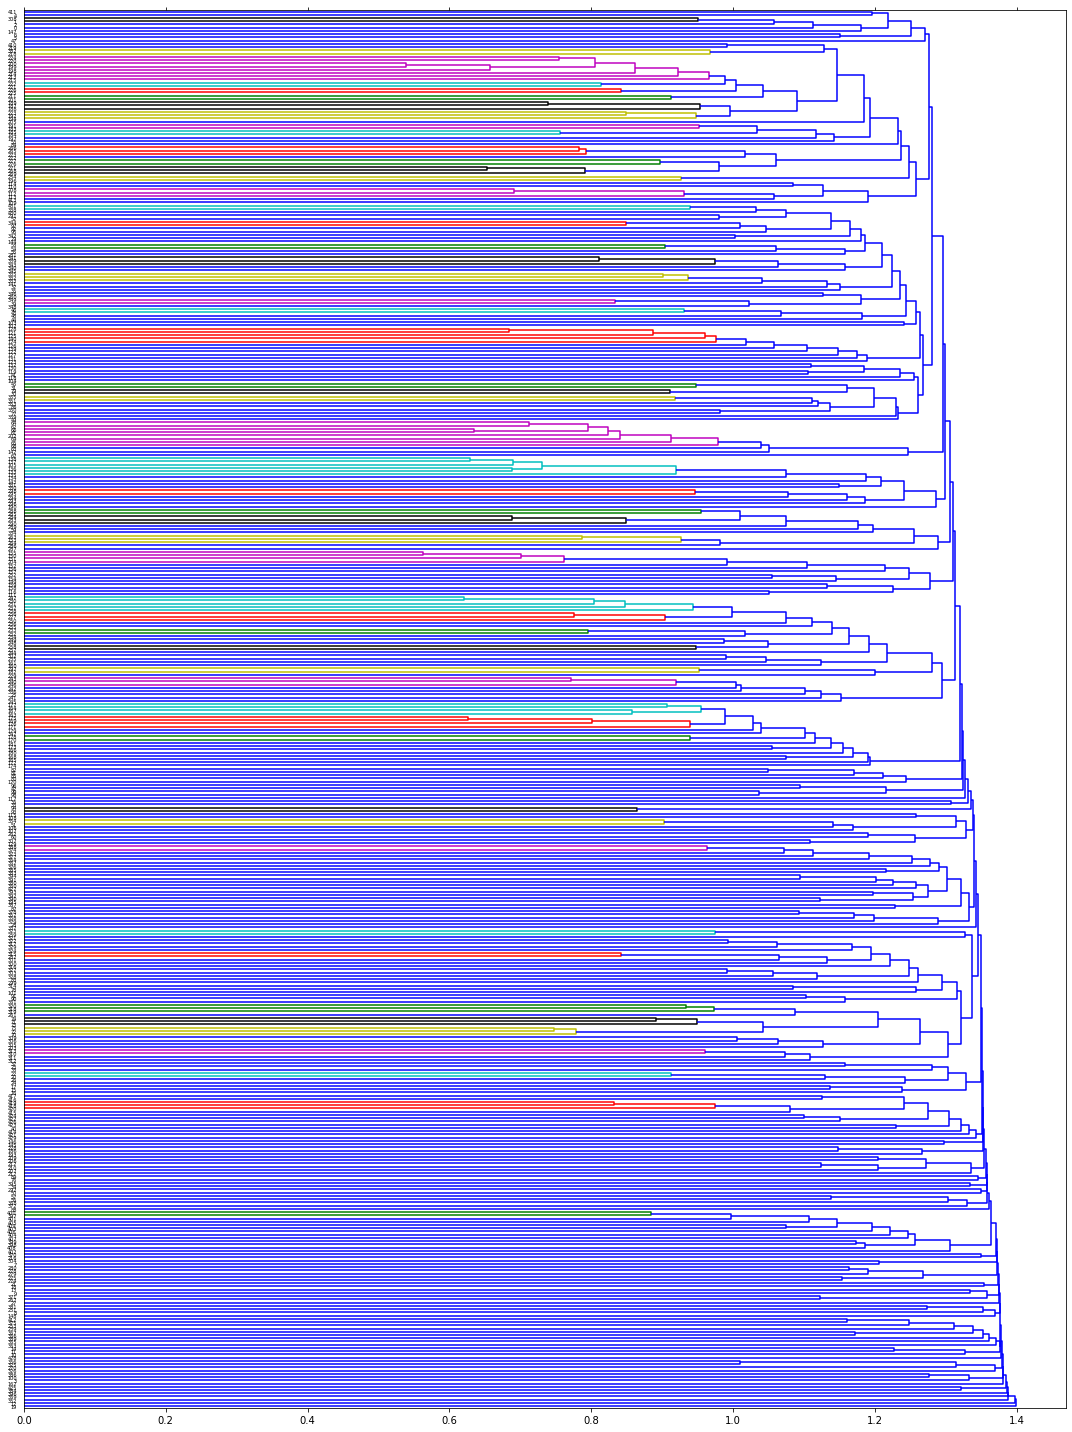

In [9]:
# Create dendogram for hierarchical clustering with top linkage combination
linkage_matrix = linkage(X, method='average', metric='euclidean')     # Linkage_matrix using Ward's method

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=section_IDs)

plt.tick_params(\
    axis= 'x',         # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('avg_euc_clusters.png', dpi=200) #save figure as ward_clusters

In [ ]:
'''# Create dendogram for hierarchical clustering with Ward's method
from scipy.cluster.hierarchy import dendrogram, ward

cosine_sim = linear_kernel(X, X)                    # Generate cosine similarity matrix: cosine_sim
dist = 1 - cosine_sim                               # Distance matrix for hierarchical clustering

linkage_matrix = ward(dist)                         #Linkage_matrix using Ward's method

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=section_IDs)

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('./_Work_in_progress/ward_clusters.png', dpi=200) #save figure as ward_clusters
'''